STUDENT DEPRESSION ANALYSIS
---------------------------------------------------------

Name:Aiswarya Reghuraj Nair
----

Organization:Entri Elevate
---

Date:
----


-------------------

1.Overview of Problem Statement:
----------

2.Objective
-----

3.Data Description
------

Import Libraries
---

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

4.Data Collection
----

Load the dataset
---

In [111]:
data=pd.read_csv("Student Depression Dataset.csv")

In [112]:
data.shape

(27901, 18)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [114]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [115]:
data.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [116]:
#The code data.describe(include='object') is used to generate descriptive statistics of the columns in a DataFrame 
#that have a data type of 'object' (typically categorical variables like strings or dates).
data.describe(include='object')

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15547,1570,27870,8310,10317,6080,17656,14398


 5.Data Preprocessing- Data Cleaning
 -----

In [117]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [118]:
imputer = SimpleImputer(strategy='median')
data['Financial Stress'] = imputer.fit_transform(data[['Financial Stress']])

In [119]:
data.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [120]:
#Drop ID column
data.drop(['id'],inplace=True,axis=1)

In [121]:
data.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


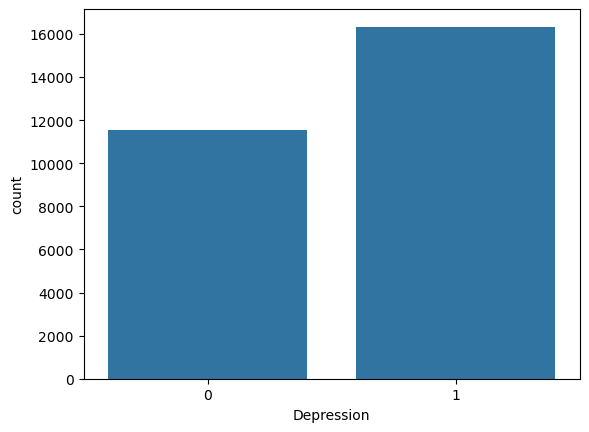

In [122]:
# Checking the distribution of customers on Revenue (Target column)
data_target = data['Depression'].copy()
data_target.value_counts()
# plot the countplot of the variable 'Revenue'
sns.countplot(x = data_target)
plt.show()

In [123]:
numerical_columns = data.select_dtypes(include=['number'])

In [124]:
numerical_columns

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1
1,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0
2,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1
4,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...
27896,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,0
27897,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0
27898,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0
27899,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1


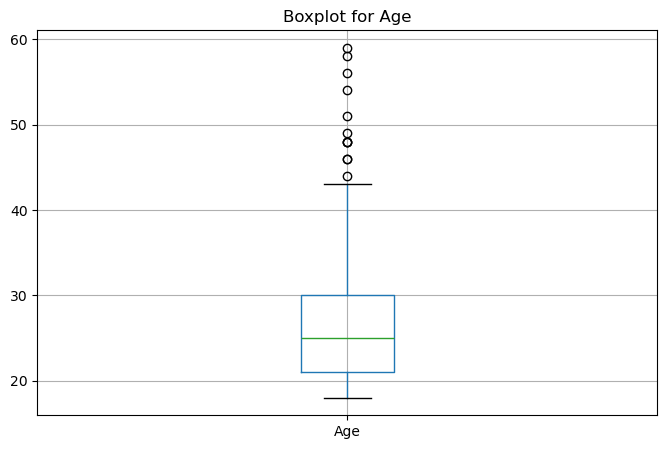

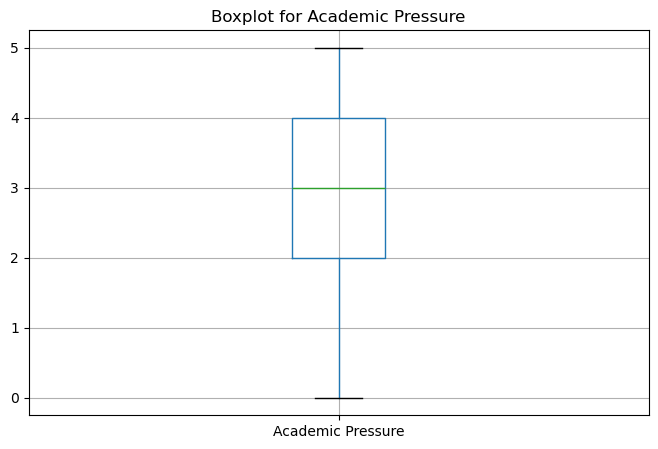

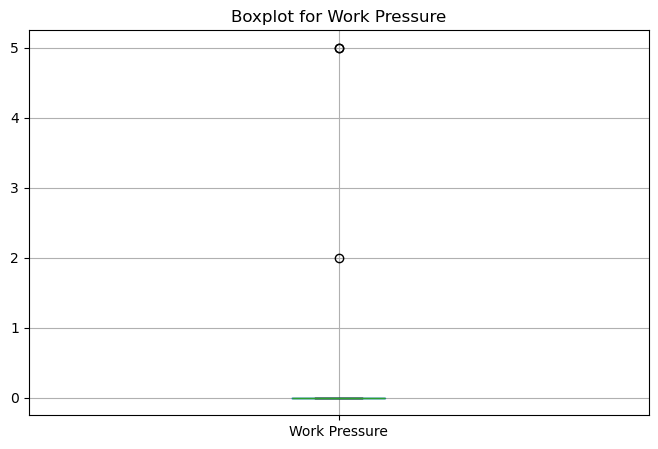

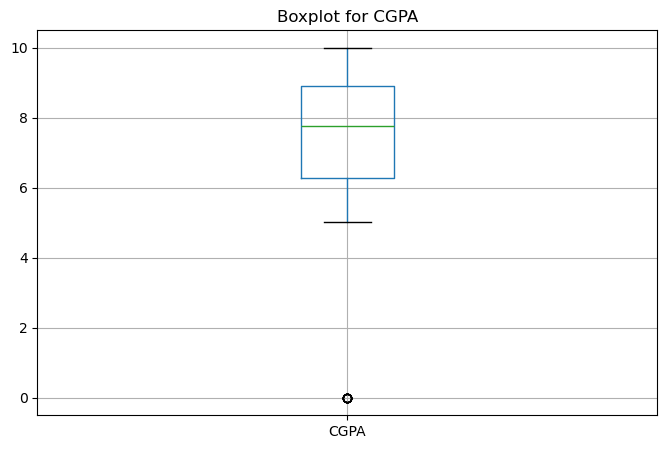

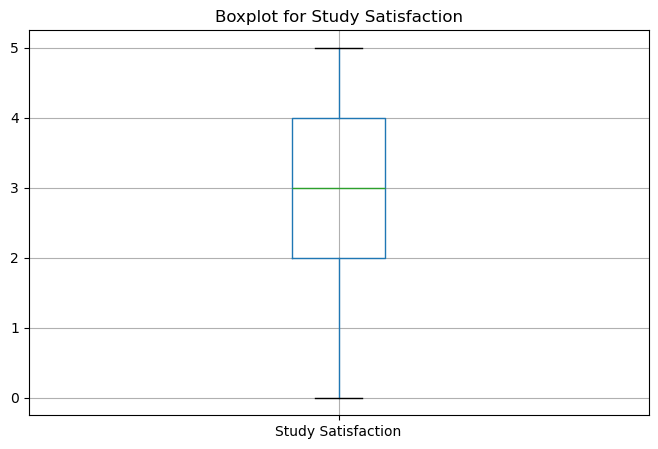

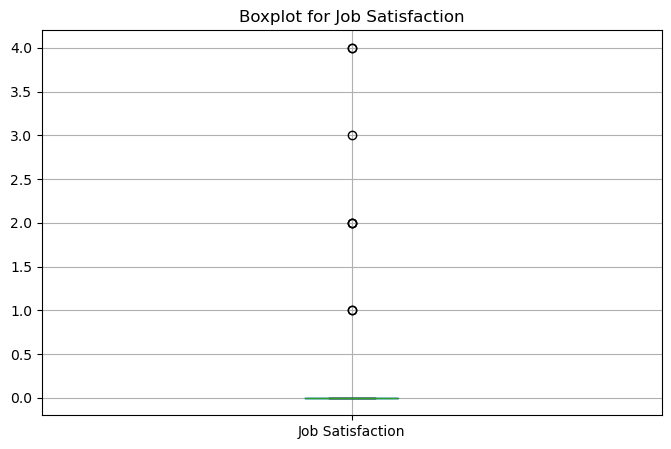

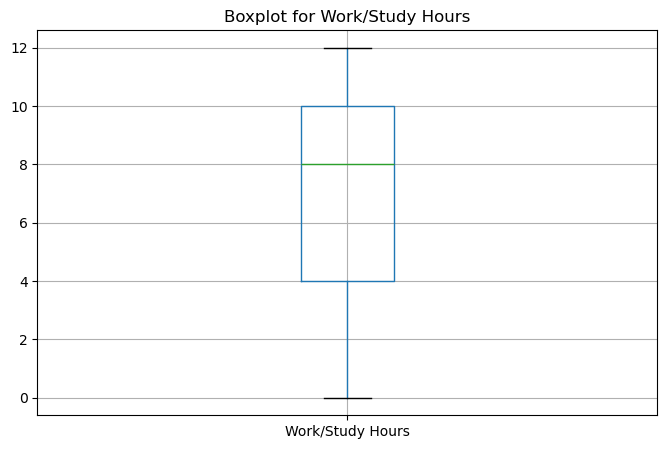

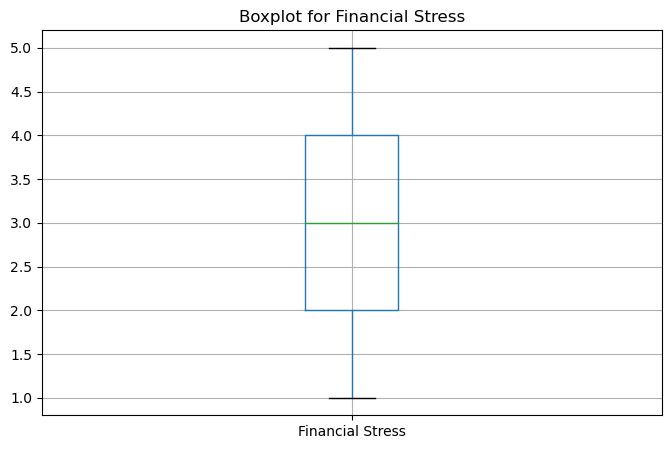

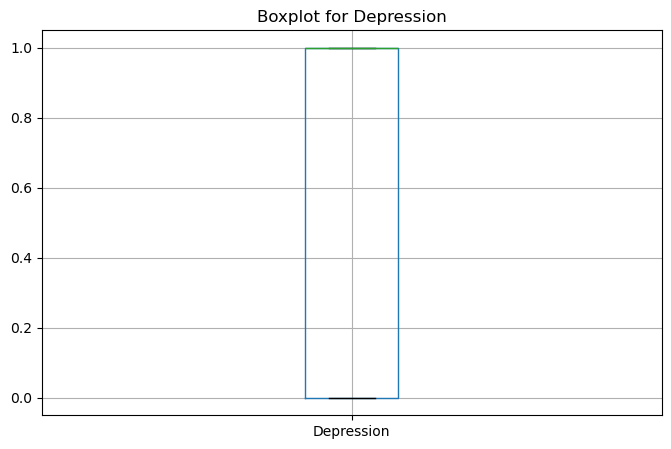

In [125]:
#Boxplot for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8,5))
    numerical_columns.boxplot(column=column)
    plt.title(f"Boxplot for {column}")

In [126]:
numerical_columns1 = data.select_dtypes(include=['number']).columns #due to error occuring in zscore 

In [128]:
numerical_columns1

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')

In [18]:
# Calculate Z-scores to identify outliers
z_scores = np.abs(zscore(data[numerical_columns1]))
outlier_threshold = 3  # Common threshold for outlier detection
outlier_indices = np.where(z_scores > outlier_threshold)

In [19]:
# Drop rows with outliers
data_cleaned = data[(z_scores < outlier_threshold).all(axis=1)]
print("Cleaned Data:")
print(data_cleaned)

Cleaned Data:
       Gender   Age           City Profession  Academic Pressure  \
0        Male  33.0  Visakhapatnam    Student                5.0   
1      Female  24.0      Bangalore    Student                2.0   
2        Male  31.0       Srinagar    Student                3.0   
3      Female  28.0       Varanasi    Student                3.0   
4      Female  25.0         Jaipur    Student                4.0   
...       ...   ...            ...        ...                ...   
27896  Female  27.0          Surat    Student                5.0   
27897    Male  27.0       Ludhiana    Student                2.0   
27898    Male  31.0      Faridabad    Student                3.0   
27899  Female  18.0       Ludhiana    Student                5.0   
27900    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90       

In [20]:
data_cleaned.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [21]:
# Check skewness of numerical features
skewness = data[numerical_columns1].skew()
print("\nSkewness of Numerical Features:")
print(skewness)

# Apply log transformation to skewed features
for col in skewness.index:
    if abs(skewness[col]) > 1:  # Threshold for high skewness
        data[f'{col}_log'] = data[col].apply(lambda x: np.log1p(x) if x > 0 else 0)
        print(f"Log-transformed {col}")


Skewness of Numerical Features:
Age                     0.132239
Academic Pressure      -0.135165
Work Pressure         108.594361
CGPA                   -0.113063
Study Satisfaction      0.010423
Job Satisfaction       74.105663
Work/Study Hours       -0.454769
Financial Stress       -0.130280
Depression             -0.347126
dtype: float64
Log-transformed Work Pressure
Log-transformed Job Satisfaction


In [22]:
data_cleaned.shape, data_cleaned.isnull().sum()

((27871, 17),
 Gender                                   0
 Age                                      0
 City                                     0
 Profession                               0
 Academic Pressure                        0
 Work Pressure                            0
 CGPA                                     0
 Study Satisfaction                       0
 Job Satisfaction                         0
 Sleep Duration                           0
 Dietary Habits                           0
 Degree                                   0
 Have you ever had suicidal thoughts ?    0
 Work/Study Hours                         0
 Financial Stress                         0
 Family History of Mental Illness         0
 Depression                               0
 dtype: int64)

In [23]:
data['Depression'].value_counts()

Depression
1    16336
0    11565
Name: count, dtype: int64

In [62]:
#Original dataset had 27,901 rows; after outlier removal, it has 27871 rows.

 6.Exploratory Data Analysis (EDA)
 ----

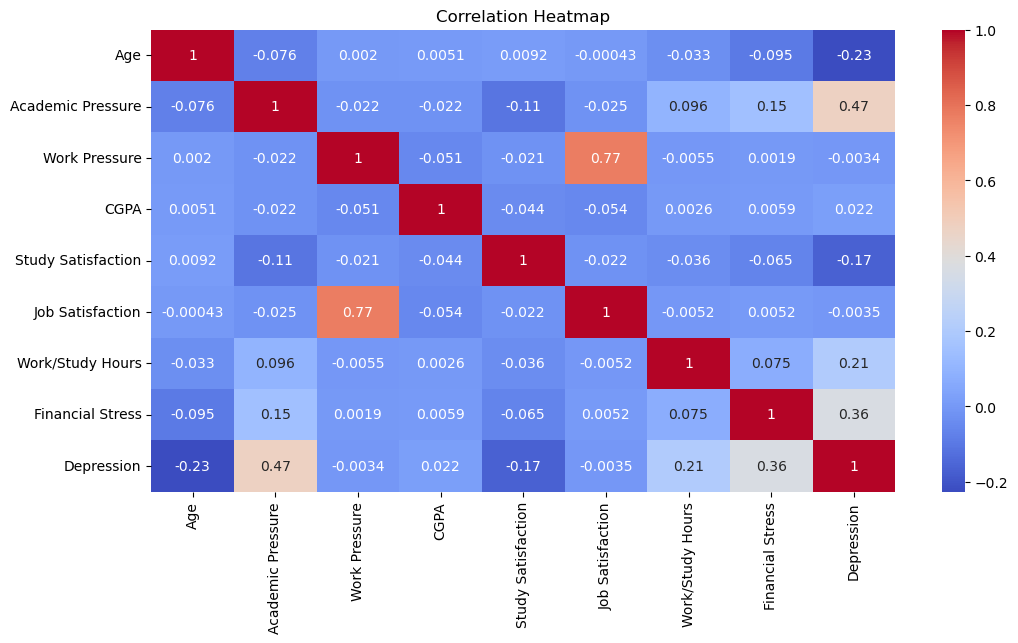

In [24]:
# Visualize correlation
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

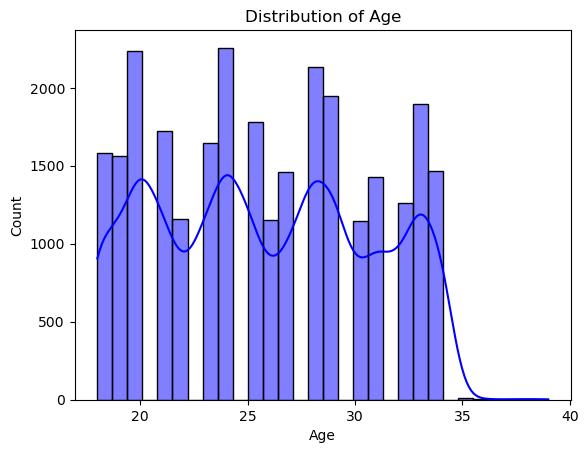

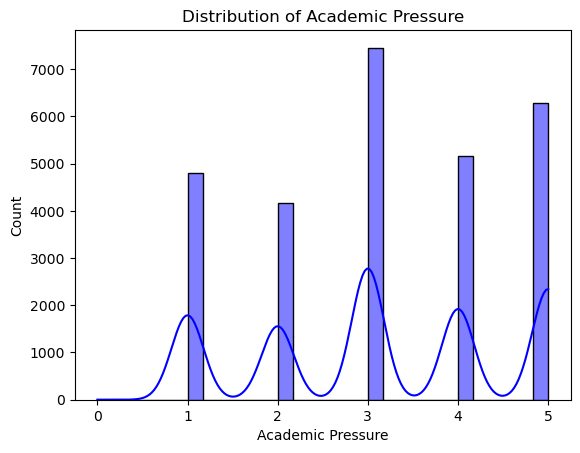

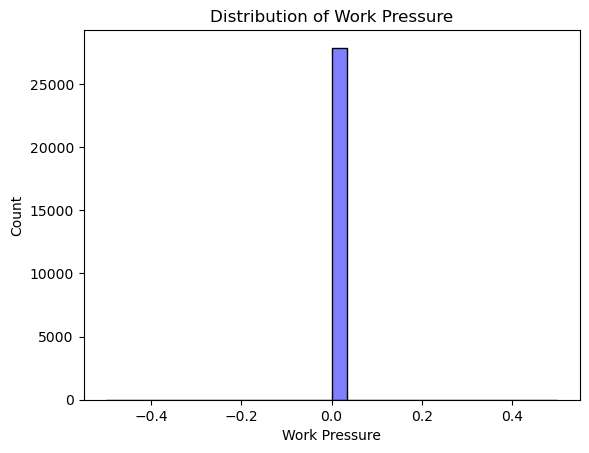

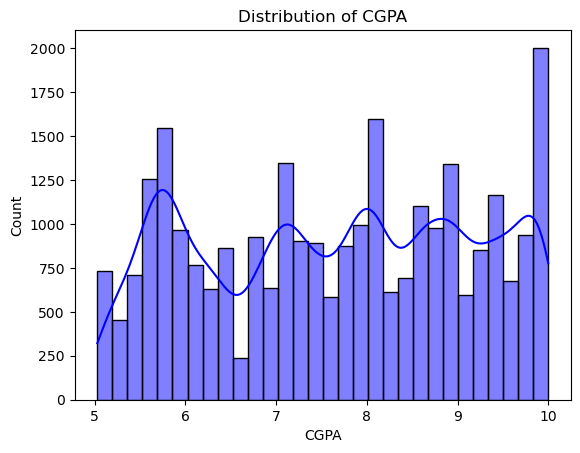

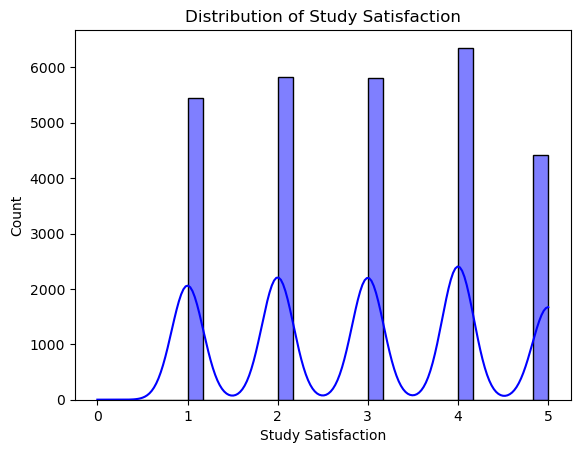

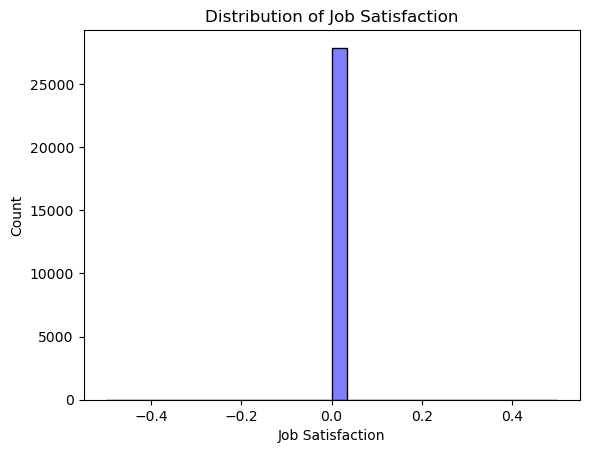

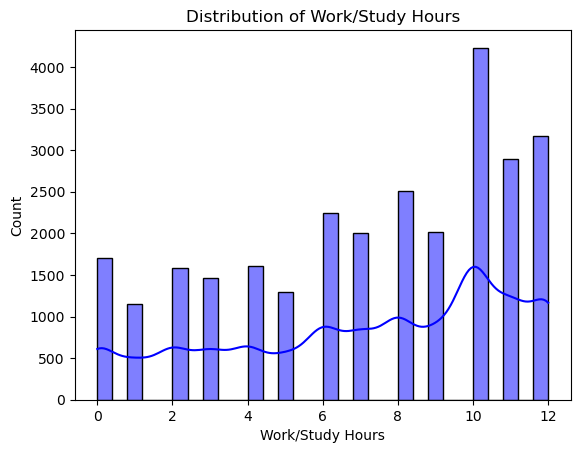

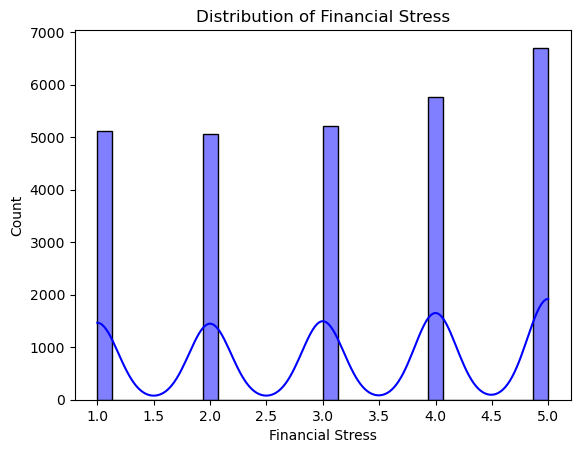

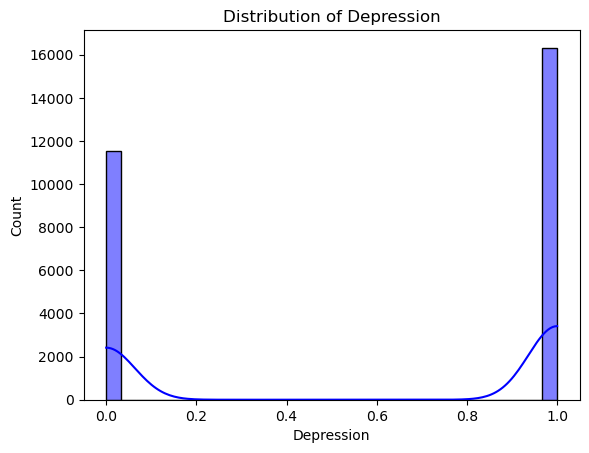

In [178]:
# Plot each numerical column
for column in numerical_columns:
    plt.figure()
    sns.histplot(data_cleaned[column], kde=True,bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.show()

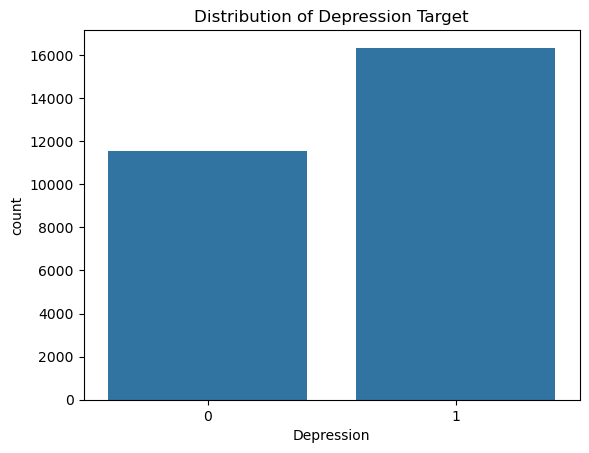

In [26]:
# Distribution of the target variable
sns.countplot(x='Depression', data=data)
plt.title('Distribution of Depression Target')
plt.show()

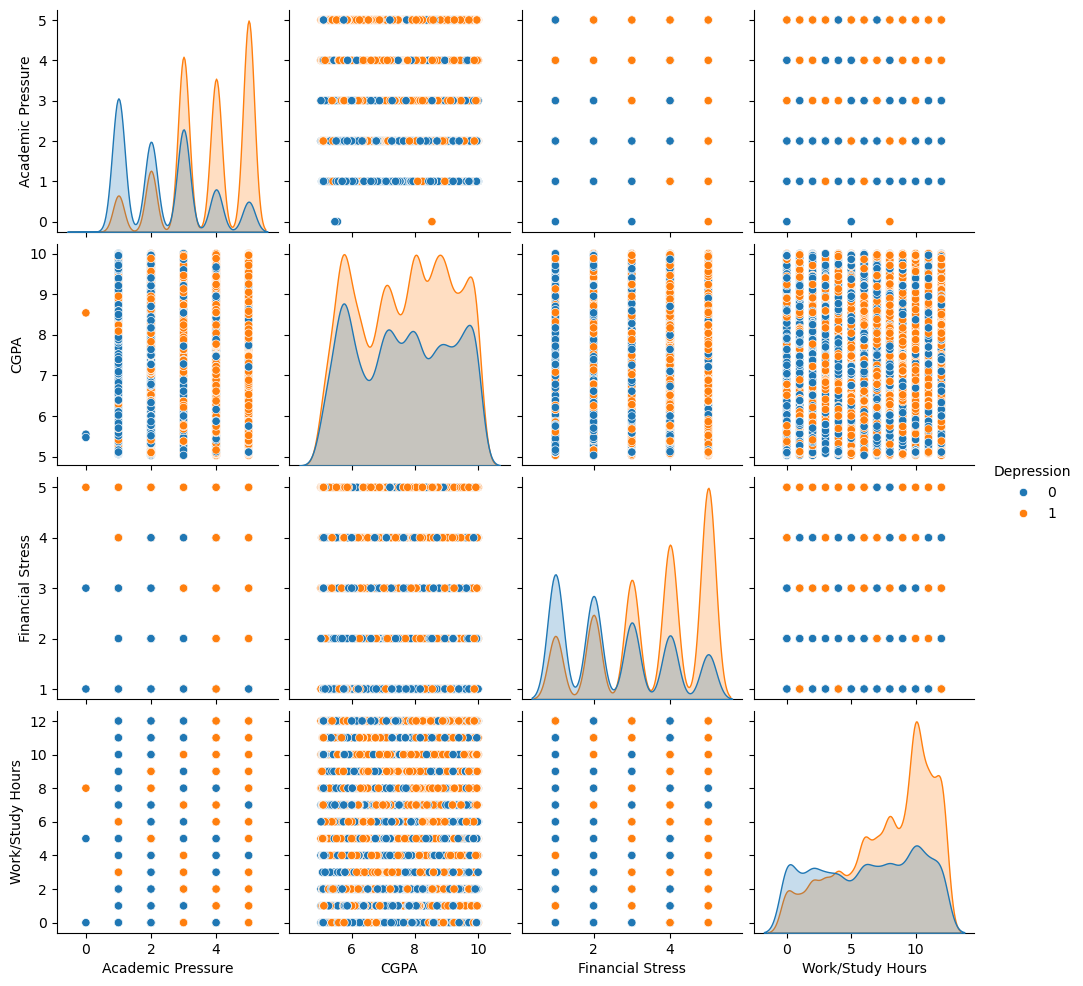

In [179]:
# Pairplot for selected features
sns.pairplot(data_cleaned, vars=['Academic Pressure', 'CGPA', 'Financial Stress', 'Work/Study Hours'], 
             hue='Depression')
#add color to the plots based  on the 'Depression' column.

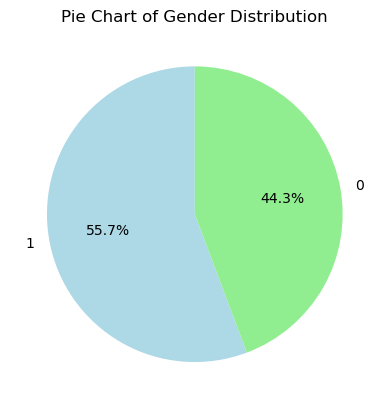

In [180]:
#Pie Diagram for a categorical column
if 'Gender' in data.columns:
    plt.figure()
    data_cleaned['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
    plt.title('Pie Chart of Gender Distribution')
    plt.ylabel('')
    plt.show()

In [181]:
#Bar Plot for categorical column counts
for column in data_cleaned.select_dtypes(include=[object]).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data_cleaned[column], palette='viridis')
    plt.title(f'Bar Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()

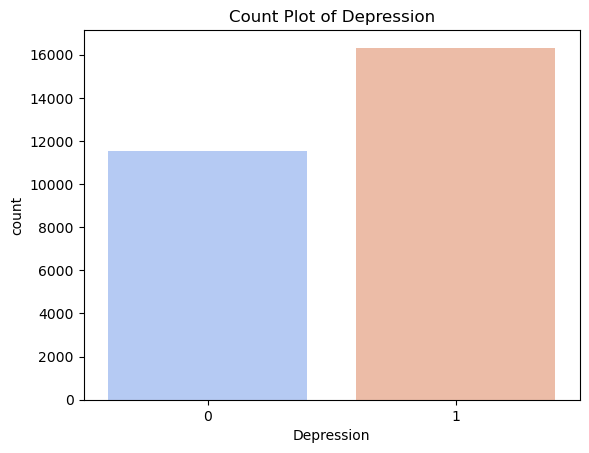

In [182]:
#Count Plot for specific target column
if 'Depression' in data_cleaned.columns:
    plt.figure()
    sns.countplot(x='Depression', data=data_cleaned, palette='coolwarm')
    plt.title('Count Plot of Depression')
    plt.show()

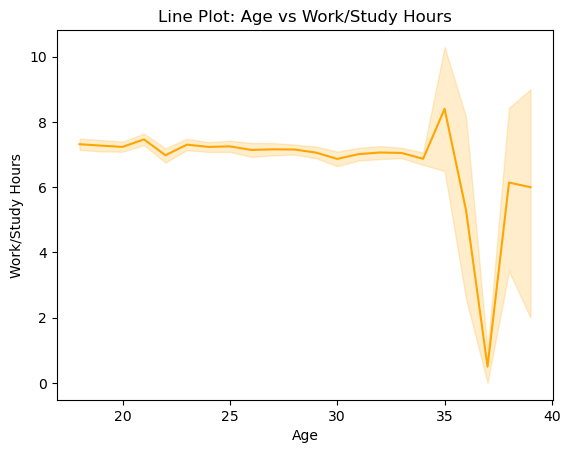

In [183]:
#Line Plot (Example with Age vs Work/Study Hours)
if 'Age' in data_cleaned.columns and 'Work/Study Hours' in data.columns:
    plt.figure()
    sns.lineplot(x='Age', y='Work/Study Hours', data=data_cleaned, color='orange')
    plt.title('Line Plot: Age vs Work/Study Hours')
    plt.show()

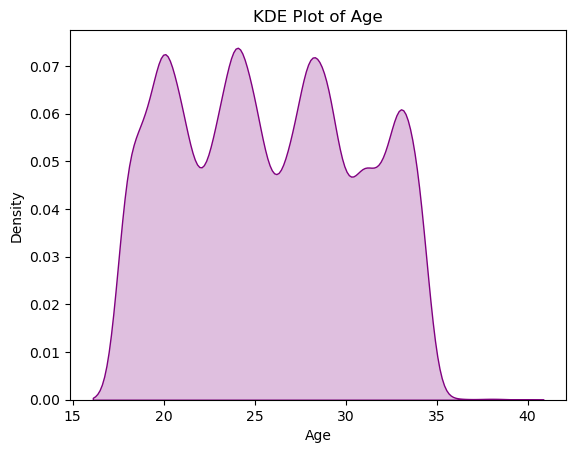

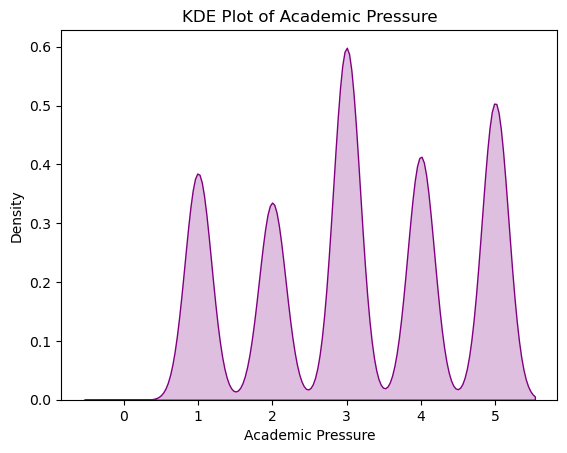

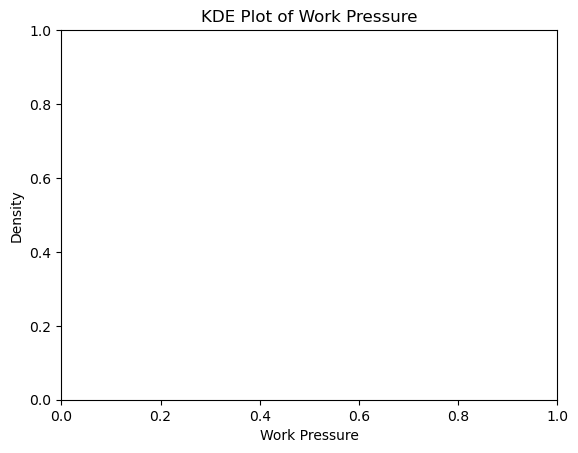

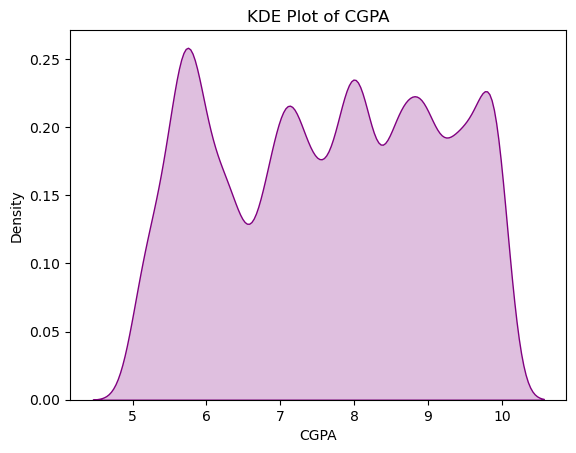

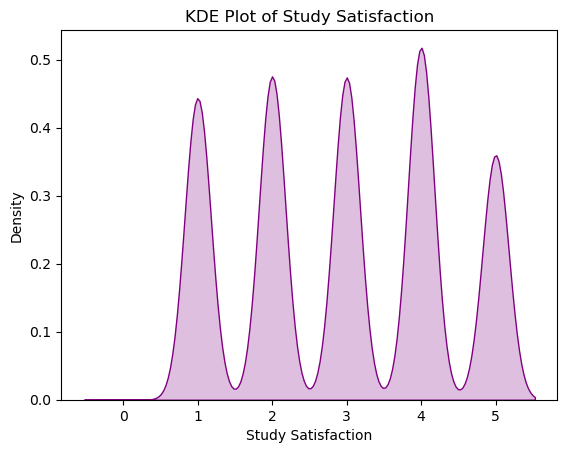

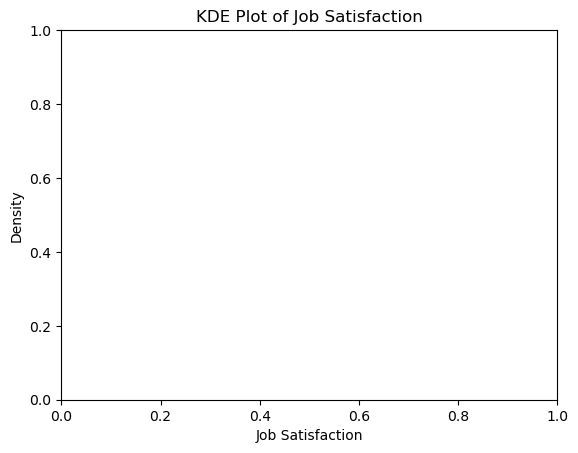

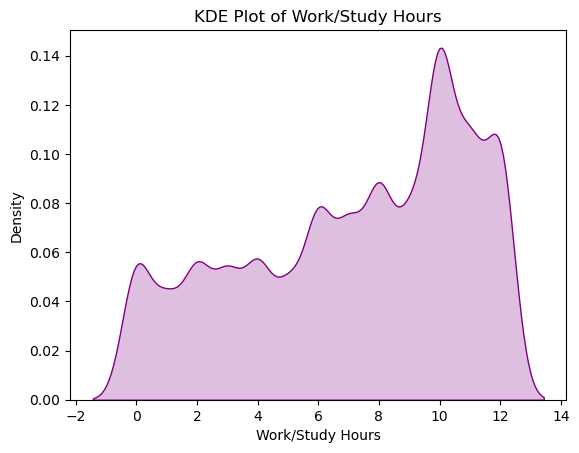

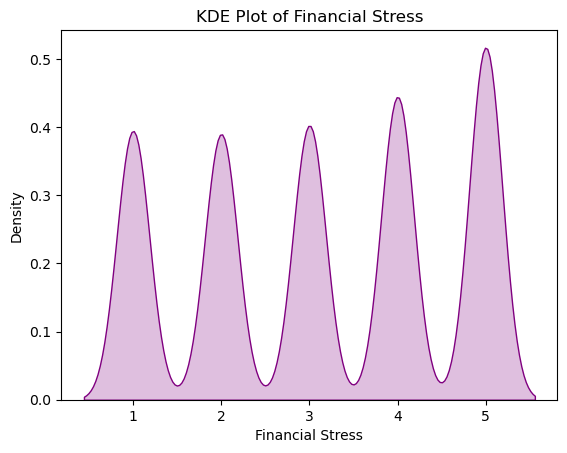

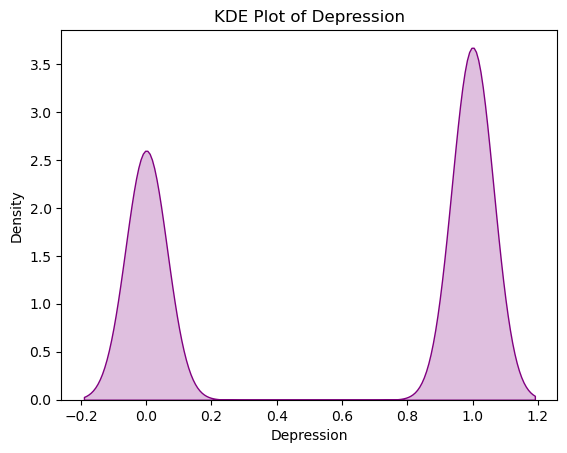

In [184]:
#KDE Plot for numeric columns
for column in numerical_columns.columns:
    plt.figure()
    sns.kdeplot(data_cleaned[column], shade=True, color='purple')
    plt.title(f'KDE Plot of {column}')
    plt.show()

7.Feature Engineering
---

In [185]:
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

In [142]:
categorical_columns

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

In [186]:
# One-Hot Encoding for categorical columns(no ordinal relationship)
data_onehot_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

In [75]:
#An ordinal relationship is a type of data relationship where the order or ranking of the values matters. 
#It implies that the categories can be placed in a meaningful sequence, 
#but the exact differences between the categories are not necessarily uniform or known.

In [187]:
# Label Encoding for categorical columns (if ordinal relationship exists)
label_encoder = LabelEncoder()
for column in categorical_columns:
    # Applying label encoding for each column
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])

In [188]:
print("Data after One-Hot Encoding (if applied):\n", data_onehot_encoded.head())
print("\nData after Label Encoding (if applied):\n", data_cleaned.head())

Data after One-Hot Encoding (if applied):
    Gender   Age  City  Profession  Academic Pressure  Work Pressure  CGPA  \
0       1  33.0    51          11                5.0            0.0  8.97   
1       0  24.0     3          11                2.0            0.0  5.90   
2       1  31.0    44          11                3.0            0.0  7.03   
3       0  28.0    49          11                3.0            0.0  5.59   
4       0  25.0    16          11                4.0            0.0  8.13   

   Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0                 2.0               0.0               0               0   
1                 5.0               0.0               0               1   
2                 5.0               0.0               2               0   
3                 2.0               0.0               1               1   
4                 3.0               0.0               0               1   

   Degree  Have you ever had suicidal thoug

In [191]:
# Ensure target variable is binary
le = LabelEncoder()
data_cleaned['Depression'] = le.fit_transform(data_cleaned['Depression'])
print(data_cleaned['Depression'].unique())  # Check unique values
print(data_cleaned['Depression'].value_counts())  # Count occurrences of each value

[1 0]
Depression
1    16325
0    11546
Name: count, dtype: int64


8.Feature Selection
---

In [192]:
#Random Forest Feature Selection
# Separate features and target
X = data_cleaned.drop(columns=['Depression'])  # Assuming 'Depression' is the target column
y = data_cleaned['Depression']

In [194]:
X

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0
1,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1
2,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1
3,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1
4,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,45,11,5.0,0.0,5.75,5.0,0.0,0,3,11,1,7.0,1.0,1
27897,1,27.0,25,11,2.0,0.0,9.40,3.0,0.0,2,0,25,0,0.0,3.0,1
27898,1,31.0,9,11,3.0,0.0,6.61,4.0,0.0,0,3,22,0,12.0,2.0,0
27899,0,18.0,25,11,5.0,0.0,6.88,2.0,0.0,2,0,11,1,10.0,5.0,0


In [195]:
y

0        1
1        0
2        0
3        1
4        0
        ..
27896    0
27897    0
27898    0
27899    1
27900    1
Name: Depression, Length: 27871, dtype: int64

In [196]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [197]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
sorted_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                                  Feature  Importance
0                                  Gender    0.015568
1                                     Age    0.082194
2                                    City    0.072712
3                              Profession    0.000323
4                       Academic Pressure    0.159707
5                           Work Pressure    0.000000
6                                    CGPA    0.087570
7                      Study Satisfaction    0.042498
8                        Job Satisfaction    0.000000
9                          Sleep Duration    0.033379
10                         Dietary Habits    0.035796
11                                 Degree    0.061802
12  Have you ever had suicidal thoughts ?    0.233719
13                       Work/Study Hours    0.068525
14                       Financial Stress    0.090597
15       Family History of Mental Illness    0.015611


In [198]:
selector = SelectFromModel(rf, threshold=0.01)  # Select features above the mean importance
selector.fit(X, y)

# Transform data to keep selected features
X_selected = selector.transform(X)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

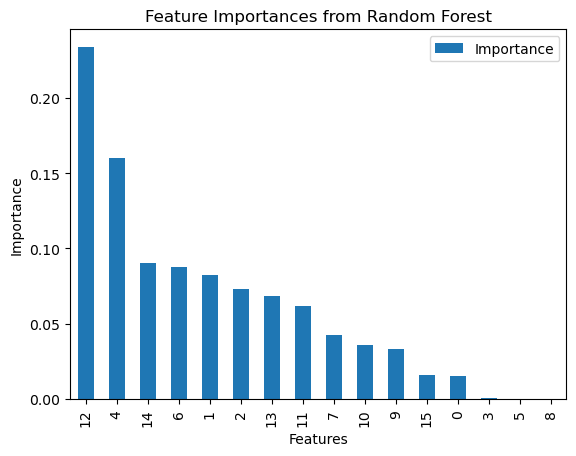

In [199]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [200]:
# Get the most important features
important_features = sorted_importances.head(10)
print("\nTop 10 Important Features from Random Forest:")
print(important_features)


Top 10 Important Features from Random Forest:
                                  Feature  Importance
12  Have you ever had suicidal thoughts ?    0.233719
4                       Academic Pressure    0.159707
14                       Financial Stress    0.090597
6                                    CGPA    0.087570
1                                     Age    0.082194
2                                    City    0.072712
13                       Work/Study Hours    0.068525
11                                 Degree    0.061802
7                      Study Satisfaction    0.042498
10                         Dietary Habits    0.035796


9.Split Data into Training and Testing Sets
----

In [201]:
# Assign X using selected features
top_n_features = feature_importances['Feature']
X_selected = X[top_n_features]

#spilit into training and testing sets
X_train,X_test,y_train,y_test= train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [202]:
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Testing labels shape (y_test):", y_test.shape)

Training set shape (X_train): (22296, 16)
Testing set shape (X_test): (5575, 16)
Training labels shape (y_train): (22296,)
Testing labels shape (y_test): (5575,)


10.Feature Scaling
---

In [203]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Display shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (22296, 16)
X_test_scaled shape: (5575, 16)


11.Model Building
----

In [204]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "k-NN": KNeighborsClassifier()
}

12.Model Evaluation
----

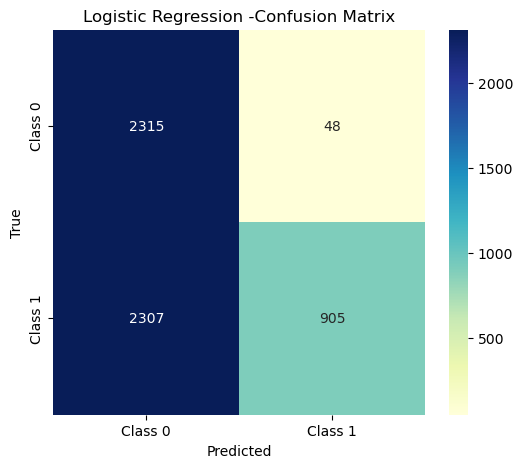

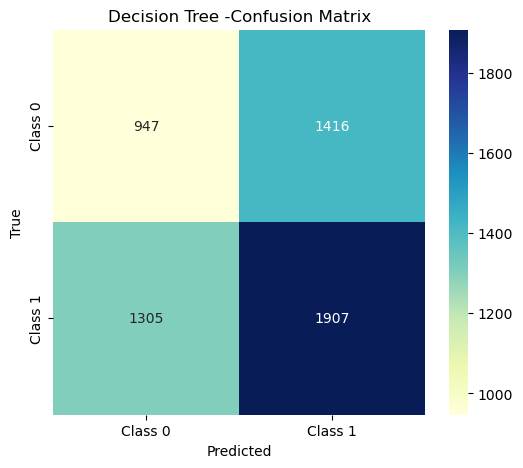

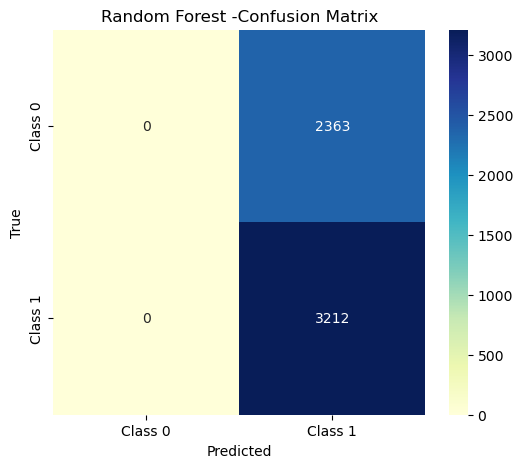

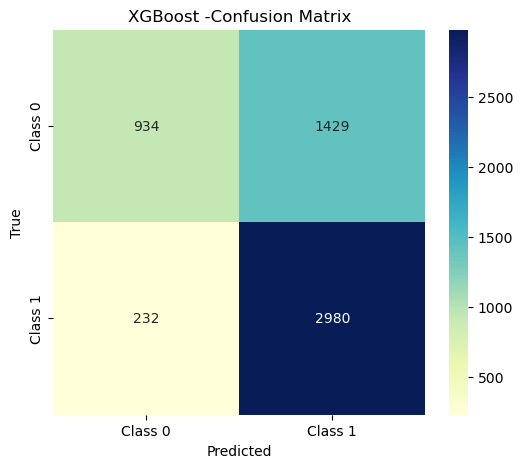

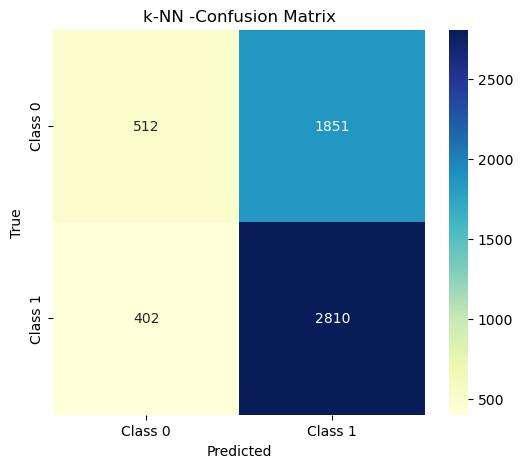

In [205]:
results = {}
# Train, evaluate, and store results for each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test)
    #y_pred = (model.predict_proba(X_test)[:, 1] > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred) # Accuracy Score 
    cm = confusion_matrix(y_test, y_pred) # Confusion Matrix  
    recall = recall_score(y_test, y_pred) # Recall   
    cr = classification_report(y_test, y_pred) # Classification Report
    
    # Storing results in the dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Recall": recall,
        "Classification Report": cr
    }
    # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"{model_name} -Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [210]:
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Recall:\n{metrics['Recall']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")


Logistic Regression:
Accuracy: 0.5776
Confusion Matrix:
[[2315   48]
 [2307  905]]
Recall:
0.28175591531755917
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.98      0.66      2363
           1       0.95      0.28      0.43      3212

    accuracy                           0.58      5575
   macro avg       0.73      0.63      0.55      5575
weighted avg       0.76      0.58      0.53      5575


Decision Tree:
Accuracy: 0.5119
Confusion Matrix:
[[ 947 1416]
 [1305 1907]]
Recall:
0.5937110834371109
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.40      0.41      2363
           1       0.57      0.59      0.58      3212

    accuracy                           0.51      5575
   macro avg       0.50      0.50      0.50      5575
weighted avg       0.51      0.51      0.51      5575


Random Forest:
Accuracy: 0.5761
Confusion Matrix:
[[   0 2363]
 [   0 3212]]
Recal

In [211]:
# Results
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}")

Model Performance:
Logistic Regression: Accuracy = 0.5776
Decision Tree: Accuracy = 0.5119
Random Forest: Accuracy = 0.5761
XGBoost: Accuracy = 0.7021
k-NN: Accuracy = 0.5959


In [213]:
best_model_name = max(results, key=lambda model: results[model]['Accuracy'])
best_model_accuracy = results[best_model_name]['Accuracy']

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

The best model is XGBoost with an accuracy of 0.7021
